# IML - Praca domowa 5
## Aleksandra Łuczak
### Dataset: colon z pakietu survival w R
Są to dane o leczeniu raka jelita grubego. Zmienne opisują między innymi wiek, płeć, wielkość raka, parametry zdrowotne pacjentów, paramtery dotyczące operacji wycięcia raka oraz o leczniu.

Problem jaki staram się rozwiązać to przewidywanie długości życia w zależności od leczenia jaki dany pacjent dostał. Możliwości to: Levamisole (eksperymntalna metoda) oraz Levamisol i 5-FluoroUracyl. 5-FluoroUracyl stosuje się jako metoda 'znana'. 

In [22]:
from Appendix_AL import *

In [23]:
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from lightgbm import LGBMRegressor

Do rozwiązania problemu użyłam różnych typów algorytmów. 

Między innymi 
 * t-learnerów, 
 * s-learnerów,
 * x-learnerów. 
 
Każdy learner jest bazowym algorytmem, który łączymy z innym, w moim przypadku wzięłam:
 * XGBoosta, 
 * MLP,
 * LightGBM.
 
Każdy typ algorytmu daje dwa zestawy feature_importance, gdyż testujemy dwa zestawy leków.

# T-learnery

### XGBoost

Zauważmy, że w tym przypadku 'top 2' najważniejsze zmienne są takie same dla obu typów leczenia, jednak ich ważność jest różna, dla leku Levamisole bardzo ważne jest w jakim wieku jest pacjent. 

Dla leczenia Levamisole i 5-FluoroUracyl ważniejsza jest zmienna `nodes`, mówiąca o ilośći węzłów chłonnych, w których wykryto komórki guza. Może to być spowodowane, tym że 5-FluoroUracyl jest mocniejszym lekiem i każdy pacjent niezaleznie od wieku przechodzi leczenie równie ciężko. 

Zmienna `status`, określająca czy było 'zaślepienie' czy nie, w obu przypdakach ma podobną ważność, dalsze zmienne, czyli płeć, czas od opracji, zasięg nowotworu również są na podobnym poziomie ważności. 

Zmienna która jest najbardziej nieważna w obu przypadkach to `perfor`, jest to zmienna binarna mówiąca o tym, czy nastąpiła perforacja jelita. Brak wpływu tej zmiennej może być spowodowane tm, że ta zmienna jest mocno niezbalansowana.

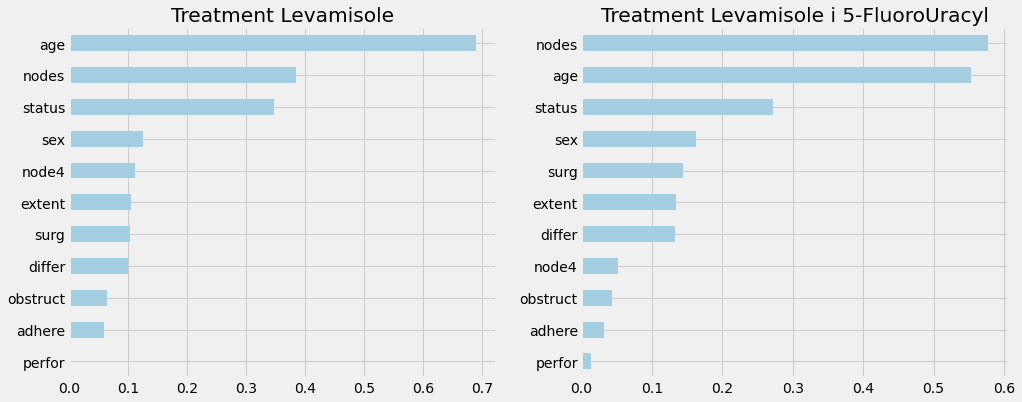

In [3]:
imp_xgtb = plot_importance(XGBTRegressor(random_state=123))

### MLP

Zauważmy, że dla `MLP` Dla leczenia 'Levamisole' Najlepsza zmienna to `adhere`, określajca przyleganie guza o okolicznych narządów. Co z punktu widzenia lekarzy ma bardzo duże znaczenie. Dla XGboosta, ta zmienna miała znaczenie znikome.
Kolejnymi wartościowymi zmiennymi jest `age` oraz `nodes` - podobnie jak w przypadku XGBoosta. 

Dla leczenia 5-FluoroUracylem najważniejszą zmienną jest `sex`, zaraz poniej `status` oraz `nodes` oraz `age`. Zmienne te w powyższym modelu również plasowały się w czołówce, tuta jedynie kolejność się zmieniła.
Zauważmy że tutaj zmienna `adhere` również nie ma dużego znaczenia.


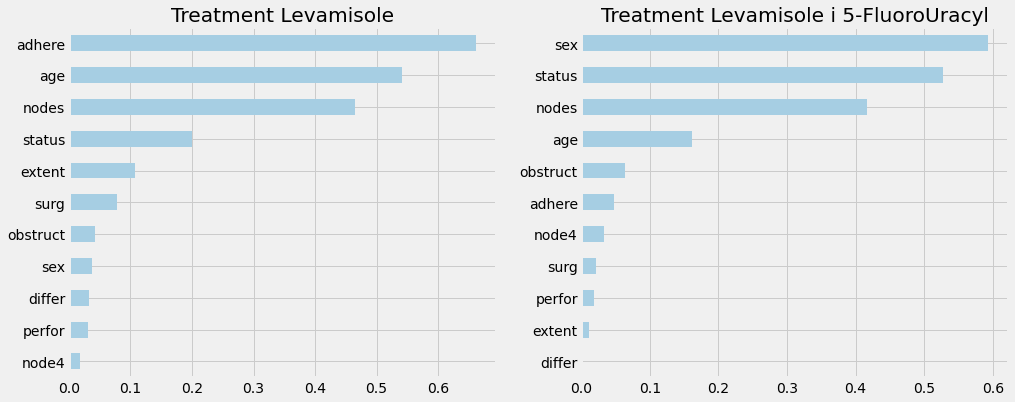

In [4]:
imp_mltp = plot_importance(MLPTRegressor(hidden_layer_sizes=(10, 10),
                 learning_rate_init=.1,
                 early_stopping=True,
                 random_state=123))

## _-learner+LightGMB

### T-LightGBM

Dla algorytmu T-learner z LightGMB dla leczenia 'Levamisole'  trzy pierwsze zmienne są identyczne jak dla t-learnera XGBoosta. Są to algorytmy o podobnej budowie, więc spodziewamy się podobnych wyników. Nie dziwi więc fakt, że dla leczenia Levamisole i 5-FluoroUracyl mamy również podobne zmienne w czołówce i w końcówce. 

W obu leczniach widzimy, że przodują zmienne:
* `age` - wiek
* `nodes` - ilość wyciętych węzłów chłonnyh z wykrywalnym rakiem
* `status` - status zaślepienia (zmienne binarna) 

Zwróćmy uwagę, że zmienna `perfor` - mówiąca o wystąpieniu bądź nie, perforacji jelita (dziury w jelicie) jest nie znacząca, Z logicznego punktu widzenia jest to dość ważny czynnik, aczkolwiek na taki wynik ma prawdopodobnie wpływ bardzo duże niezbalansowanie. 

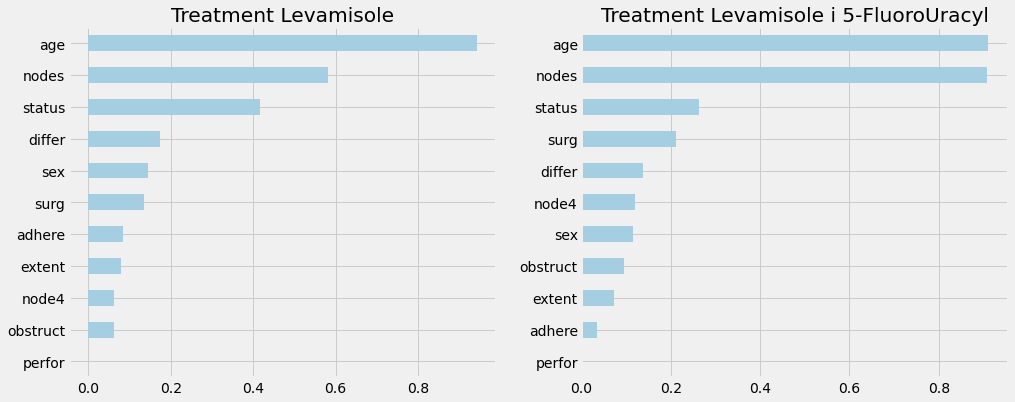

In [5]:
imp_TLGBM = plot_importance(BaseTRegressor(LGBMRegressor()))

### S-LightGBM

Dla algorytmu S-learner z LightGMB dla leczenia 'Levamisole'  trzy pierwsze zmienne są identyczne jak dla t-learnera LightGMB. Są to algorytmy o podobnej budowie, więc spodziewamy się podobnych wyników. 

W leczniu 'Levamisole' widzimy, że przodują zmienne:
* `age` - wiek
* `nodes` - ilość wyciętych węzłów chłonnyh z wykrywalnym rakiem
* `status` - status zaślepienia (zmienne binarna) 

Takie same jak powyżej, lecz w leczeniu z 5-FluoroUracylem zmienne się zmieniły, największy wpływ mają:
* `age` - wiek
* `nodes` - ilość wyciętych węzłów chłonnyh z wykrywalnym rakiem
trochę mniejszy, lecz dalej ważny wpływ mają zmienne:
* `surg` - czas od operacji
* `differ` - zróżnicowanie komórek guzowych
* `status` - status zaślepienia (zmienne binarna) 

Zwróćmy uwagę, że zmienne:
* `perfor` - mówiąca o wystąpieniu bądź nie, perforacji jelita (dziury w jelicie) 
* `adhere` - przyleganie komórek guzowych do okolicnych narządów
* `node4` - czy ilość wyciętych węzłów chłonnyh z wykrywalnym rakiem jest większa niż 4
są bardzo mało znaczące.
Wszystkie trzy są zmiennymi binarnymi niezbalansowanymi, więc to moż mieć wpływ na wynik.

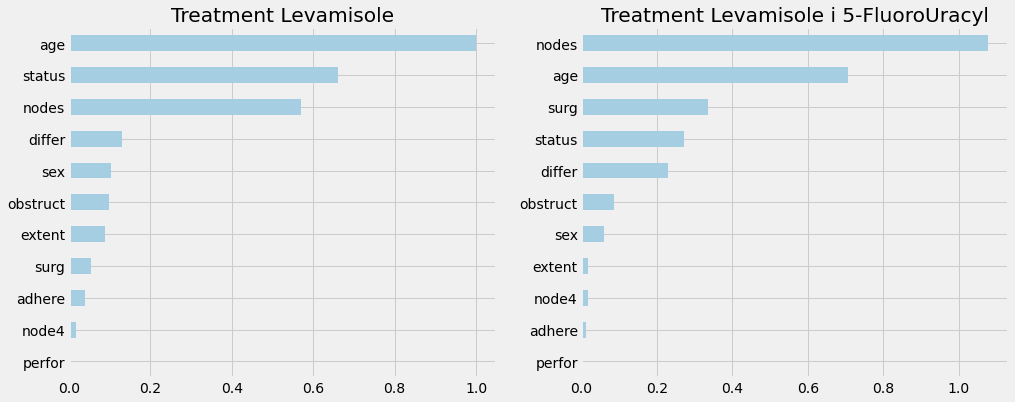

In [6]:
imp_SLGBM = plot_importance(BaseSRegressor(LGBMRegressor()))

### X-LigthGBM

Dla algorytmu X-learner z LightGMB dla leczenia 'Levamisole'  trzy pierwsze zmienne są identyczne jak dla T-learnera i S-learnera LightGMB. Są to algorytmy o podobnej budowie, więc spodziewamy się podobnych wyników. 

W leczniu 'Levamisole' widzimy, że przodują zmienne:
* `age` - wiek
* `nodes` - ilość wyciętych węzłów chłonnyh z wykrywalnym rakiem
* `status` - status zaślepienia (zmienne binarna) 
* `adhere` - przyleganie komórek guzowych do okolicnych narządów

Zauważmy że powyżej zmienna `adhere` była bardzo mało znacząca, widać tutaj że różnica w działaniu modelów odbija się na braniu innych zmiennych pod uwagę.

W leczeniu z 5-FluoroUracylem najważniejsze zmienne się nie zmieniły, największy wpływ mają:
* `age` - wiek
* `nodes` - ilość wyciętych węzłów chłonnyh z wykrywalnym rakiem

Zwróćmy uwagę, że zmienne:
* `perfor` - mówiąca o wystąpieniu bądź nie, perforacji jelita (dziury w jelicie) 
* `adhere` - przyleganie komórek guzowych do okolicnych narządów
* `node4` - czy ilość wyciętych węzłów chłonnyh z wykrywalnym rakiem jest większa niż 4
są bardzo mało znaczące. Tak jak w przypadku powyżej.

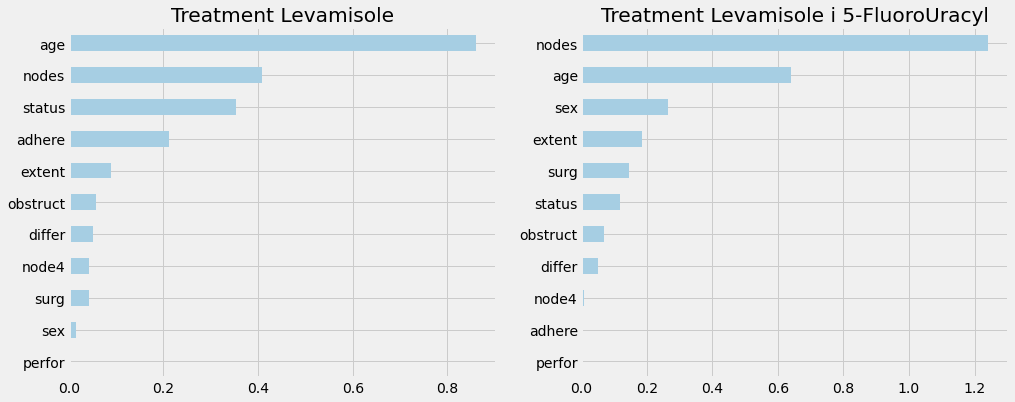

In [7]:
imp_XLGMB = plotx_importance()

# Treatment Levamisole

Poniżej przedstawiłam porównanie numeryczne wartości `feature_importance` dla zestawów:
* różne learnery z LightGBM
* t-learner z różnymi algorytmami:
    * LightGBM
    * XGBoost
    * MLP
Każde zestawienie jest dla obu typów leczenia

In [19]:
pd.DataFrame({'X-LightGBM':imp_XLGMB[1], 
              'S-LightGBM':imp_SLGBM[1],
              'T-LightGBM':imp_TLGBM[1]}).sort_values('T-LightGBM', ascending = False)

,X-LightGBM,S-LightGBM,T-LightGBM
age,0.859555,0.998646,0.942015
nodes,0.407846,0.570498,0.582468
status,0.352363,0.660853,0.416849
differ,0.051678,0.130931,0.174431
sex,0.015362,0.103967,0.143919
surg,0.042282,0.053830,0.135914
adhere,0.210733,0.039334,0.084144
extent,0.089448,0.087819,0.079428
node4,0.042959,0.018181,0.061910
obstruct,0.057178,0.098428,0.061187


In [18]:
pd.DataFrame({'T-LightGBM':imp_TLGBM[1],
              'T-XGBoost':imp_xgtb[1],
              'T-MLP':imp_mltp[1]}).sort_values('T-LightGBM', ascending = False)

,T-LightGBM,T-XGBoost,T-MLP
age,0.942015,0.689340,0.540418
nodes,0.582468,0.384738,0.464015
status,0.416849,0.347543,0.199240
differ,0.174431,0.099705,0.033317
sex,0.143919,0.126450,0.038360
surg,0.135914,0.103482,0.078936
adhere,0.084144,0.059581,0.660612
extent,0.079428,0.106145,0.107734
node4,0.061910,0.112346,0.017492
obstruct,0.061187,0.064341,0.042168


# Treatment Levamisole + 5-FluoroUracyl

In [20]:
pd.DataFrame({'X-LightGBM':imp_XLGMB[2], 
              'S-LightGBM':imp_SLGBM[2],
              'T-LightGBM':imp_TLGBM[2]}).sort_values('T-LightGBM', ascending = False)

,X-LightGBM,S-LightGBM,T-LightGBM
age,0.638641,0.706955,0.910383
nodes,1.241392,1.078143,0.907313
status,0.118708,0.273147,0.264457
surg,0.145713,0.336256,0.212688
differ,0.051975,0.230918,0.138510
node4,0.008357,0.016986,0.119947
sex,0.265850,0.060868,0.116455
obstruct,0.068072,0.085272,0.094838
extent,0.185366,0.017613,0.071997
adhere,0.002172,0.013335,0.035728


In [21]:
pd.DataFrame({'T-LightGBM':imp_TLGBM[2],
              'T-XGBoost':imp_xgtb[2],
              'T-MLP':imp_mltp[2]}).sort_values('T-LightGBM', ascending = False)

,T-LightGBM,T-XGBoost,T-MLP
age,0.910383,0.552275,0.161987
nodes,0.907313,0.577212,0.415988
status,0.264457,0.271768,0.527624
surg,0.212688,0.144284,0.021144
differ,0.138510,0.132437,0.001782
node4,0.119947,0.051968,0.033041
sex,0.116455,0.163153,0.593213
obstruct,0.094838,0.043885,0.063085
extent,0.071997,0.134404,0.010736
adhere,0.035728,0.032622,0.047748
